In [1]:
from dir_helpers import loadDirs, loadImages, loadImagesRecursive

In [2]:
loadDirs('gear_images')

[PosixPath('gear_images'),
 PosixPath('gear_images/tents'),
 PosixPath('gear_images/pulleys'),
 PosixPath('gear_images/boots'),
 PosixPath('gear_images/carabiners'),
 PosixPath('gear_images/hardshell_jackets'),
 PosixPath('gear_images/rope'),
 PosixPath('gear_images/harnesses'),
 PosixPath('gear_images/helmets'),
 PosixPath('gear_images/crampons'),
 PosixPath('gear_images/axes'),
 PosixPath('gear_images/insulated_jackets'),
 PosixPath('gear_images/gloves')]

In [3]:
# loadImages('gear_images/tents')

In [4]:
# loadImagesRecursive('gear_images')

In [5]:
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

img = mpimg.imread("gear_images/tents/10101460x1013039_zm.jpeg")
#imgplot = plt.imgshow(img)

import numpy as npy
data = npy.array(img)
print("data is", npy.shape(data))



data is (124, 400, 3)


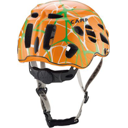

In [8]:
from PIL import Image

from image_helpers import *

def loadImage128x128(filename):
    return loadSizedImage(filename, (128, 128))

img = loadImage128x128('gear_images/tents/894568.jpeg')
img = loadImage128x128('gear_images/helmets/10274402x1011898_zm.jpeg')
#print(img.width, "x", img.height)
img


In [54]:
from pathlib import Path

all_images = loadImagesRecursive('gear_images')
output_dir = 'processed_images'

#image_number = 1

for image in all_images:
    #print("from:", image.parent.name + '/' + image.name)
    img = loadImage128x128(image)
    # print("loaded:", img)
    new_img = processImage(img)
    #filename = output_dir + '/' + str(image_number) + '.jpg'
    dirname = output_dir + '/' + image.parent.name
    directory = Path(dirname)
    if (not directory.exists()):
        print("... which doesn't exist")
        directory.mkdir()
    filename = output_dir + '/' + image.parent.name + '/' + image.name
    #print("... to:", filename)
    try:
        new_img.save(filename)
    except:
        print("problem with", filename)
    image_number += 1

problem with processed_images/harnesses/.jpeg
... which doesn't exist
... which doesn't exist
... which doesn't exist
... which doesn't exist
... which doesn't exist
problem with processed_images/gloves/.jpeg


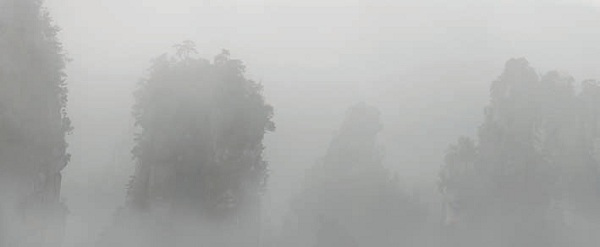

In [30]:
# img1 = Image.open("gear_images/tents/880786.jpeg")
img1 = Image.open("Low_Contrast_1.jpg")
img1

before: max = (230, 226, 225) ; min = (117, 119, 118)
extrama= ((117, 230), (119, 227), (118, 225))
after: max = (255, 252, 255) ; min = (0, 0, 0)
extrema= ((0, 255), (0, 255), (0, 255))


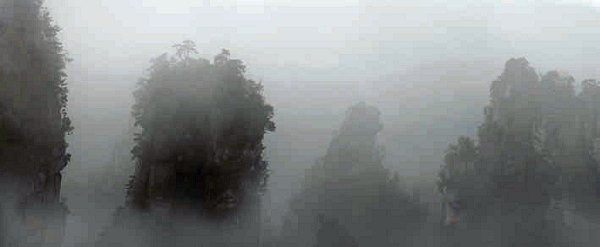

In [31]:

data = list(img1.getdata())
# p = plt.hist(data)
print("before: max =", max(data), "; min =", min(data))
print("extrama=", img1.getextrema())
#print(img1.getextrema())
# img2 = ImageOps.equalize(img1)
img2 = ImageOps.autocontrast(img1)
data = list(img2.getdata())
print("after: max =", max(data), "; min =", min(data))
print("extrema=", img2.getextrema())
img2


after: max = (255, 252, 255) ; min = (0, 0, 0)
extrema= ((0, 255), (0, 255), (0, 255))


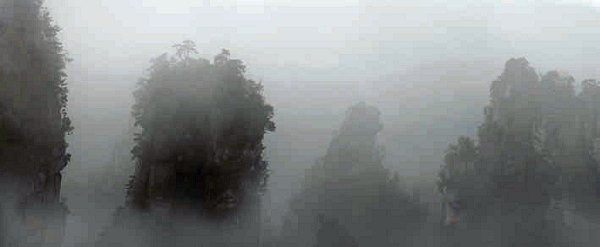

In [32]:
img3 = processImage(img1)
data = list(img3.getdata())
print("after: max =", max(data), "; min =", min(data))
print("extrema=", img3.getextrema())
img3

In [33]:
'''
data = img1.getdata()
p = plt.hist(data)
p.show()
'''

'\ndata = img1.getdata()\np = plt.hist(data)\np.show()\n'

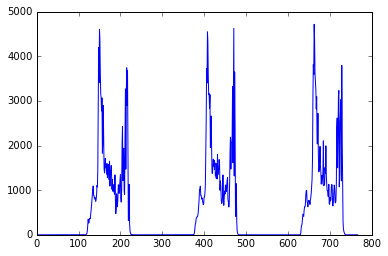

In [34]:
h_data = img1.histogram()
# p = plt.hist(h_data)
# p.show()
h_array = npy.array(h_data)
# p = plt.hist(h_array.ravel(), bins=256, range=(0,255))
p = plt.plot(h_array) # , ylim=(0,1000))


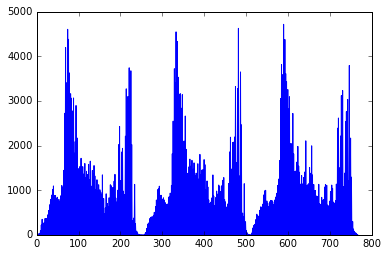

In [35]:
h_data = img3.histogram()
# p = plt.hist(h_data)
# p.show()
h_array = npy.array(h_data)

#p = plt.hist(h_array.ravel(), bins=256, range=(0,255))
p = plt.plot(h_array)